# PROJECT 

## The goal is to predict the price of a laptop based on its specifications such as RAM, screen size, weight, storage type, and other hardware features. This problem can be approached using regression techniques to model the relationship between laptop features and their market price

In [400]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# READING DATA

In [402]:
data = pd.read_csv('laptop.csv')

data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# INITIAL PRE_PROCESSING

In [404]:
data.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [405]:
data.head(30)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [406]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [407]:
data.shape

(1303, 12)

In [408]:
data.tail(20)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1283,1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1284,1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1286,1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1287,1287,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200
1288,1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1289,1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1290,1290,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1291,1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1292,1292,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200


In [409]:
data.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
506,506,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2kg,65214.72


In [410]:
data.sample(30)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
338,338,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Linux,2kg,14651.4672
1228,1228,Lenovo,Gaming,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,54825.1200
523,523,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.63kg,36709.9200
236,236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Linux,2.1kg,20779.2000
313,313,Acer,Notebook,15.6,Full HD 1920x1080,AMD A8-Series 7410 2.2GHz,8GB,256GB SSD,AMD Radeon R5,Windows 10,2.23kg,24988.3200
551,551,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,59513.2272
227,227,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,2kg,40972.3200
855,855,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,50349.6000
536,536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,42486.0048
321,321,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.79kg,31381.9200


In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [412]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [413]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# HANDLING MISSING VALUES

In [415]:

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

numeric_cols.fillna(numeric_cols.mean(), inplace=True)  


data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0          0
Inches              0
Price               0
Company             0
TypeName            0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64


In [416]:

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

numeric_cols.fillna(numeric_cols.mean(), inplace=True)   # Numerical features

for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)  # Categorical features

data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0          0
Inches              0
Price               0
Company             0
TypeName            0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11248\229396495.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)  # Categorical features


# DELETING MISSING VALUES ROW

In [418]:
data.dropna(inplace=True)

missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0          0
Inches              0
Price               0
Company             0
TypeName            0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64


In [419]:
data.shape


(1303, 12)

In [420]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [421]:
data.drop_duplicates(inplace=True)
data.shape

(1303, 12)

In [422]:
0.25-1.5* 0.5 + 1.0 + 2.0

2.5

In [423]:
0.75 + 1.5 * 0.5 + 1.0

2.5

# OUTLIER REMOVAL

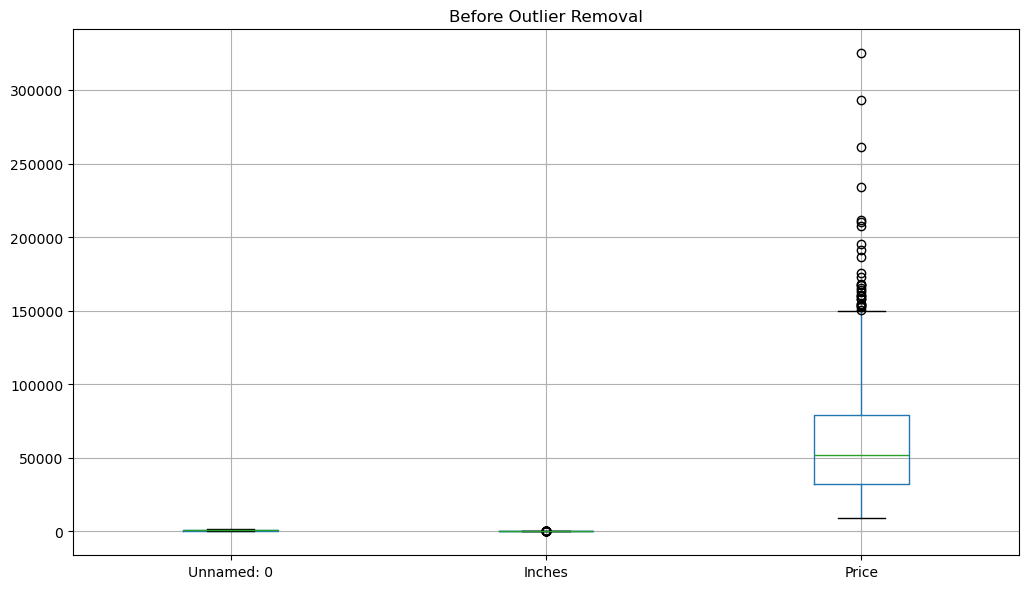

In [425]:
numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1


data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")



plt.tight_layout()
plt.show()


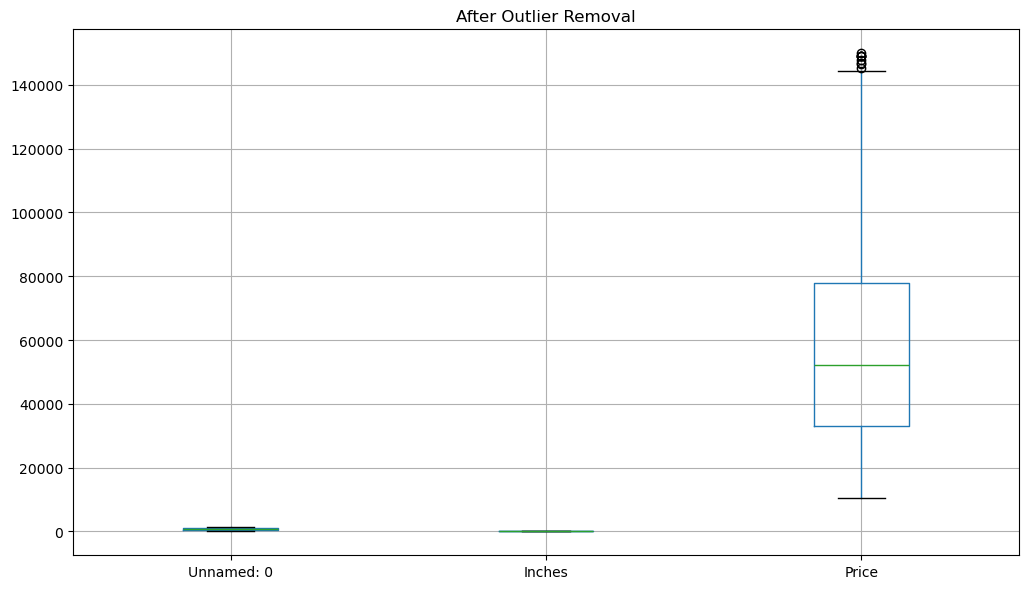

In [426]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [427]:
data_cleaned.shape

(1235, 12)

In [428]:
data_cleaned.head()

,Unnamed: 0,Inches,Price,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0,13.3,71378.6832,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,1,13.3,47895.5232,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,2,15.6,30636.0000,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,3,15.4,135195.3360,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,4,13.3,96095.8080,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


# NORMALIZATION AND STANDARIZATION

In [430]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1303, 12)

************************************************************


,Unnamed: 0,Inches,Price,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0.000000,0.385542,0.196741,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,0.000768,0.385542,0.122353,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,0.001536,0.662651,0.067679,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,0.002304,0.638554,0.398895,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,0.003072,0.385542,0.275038,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


# STANDARIZATION

In [432]:




numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1303, 12)

************************************************************


,Unnamed: 0,Inches,Price,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,-1.730722,-1.204407,0.309132,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,-1.728063,-1.204407,-0.321646,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,-1.725405,0.408772,-0.785251,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,-1.722746,0.268495,2.023301,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,-1.720088,-1.204407,0.973055,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [433]:
data.head(2)

,Unnamed: 0,Inches,Price,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0,13.3,71378.6832,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,1,13.3,47895.5232,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg


In [434]:
data["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [435]:
data.Inches.unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [436]:
data.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [437]:


cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

data1 = pd.get_dummies(cat_features)
data1

,Company,Cpu,Gpu,Memory,OpSys,Ram,ScreenResolution,TypeName,Weight
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,True


In [438]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

data1 = pd.get_dummies(data, columns=cat_features)

scaled_data = pd.concat([data, data1], axis=1)

print(scaled_data.shape)
print()
print('*' * 70)

scaled_data.head()


(1303, 544)

**********************************************************************


,Unnamed: 0,Inches,Price,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight_4.2kg,Weight_4.33kg,Weight_4.36kg,Weight_4.3kg,Weight_4.42kg,Weight_4.4kg,Weight_4.5kg,Weight_4.6kg,Weight_4.7kg,Weight_4kg
0,0,13.3,71378.6832,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,False,False,False,False,False,False,False,False,False,False
1,1,13.3,47895.5232,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,False,False,False,False,False,False,False,False,False,False
2,2,15.6,30636.0000,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,False,False,False,False,False,False,False,False,False,False
3,3,15.4,135195.3360,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,False,False,False,False,False,False,False,False,False,False
4,4,13.3,96095.8080,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,False,False,False,False,False,False,False,False,False,False


In [439]:
data.columns

Index(['Unnamed: 0', 'Inches', 'Price', 'Company', 'TypeName',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [440]:
scaled_data.columns

Index(['Unnamed: 0', 'Inches', 'Price', 'Company', 'TypeName',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu',
       ...
       'Weight_4.2kg', 'Weight_4.33kg', 'Weight_4.36kg', 'Weight_4.3kg',
       'Weight_4.42kg', 'Weight_4.4kg', 'Weight_4.5kg', 'Weight_4.6kg',
       'Weight_4.7kg', 'Weight_4kg'],
      dtype='object', length=544)

# DATA REDUCTION & PCA

(1303, 15)
[[ 0.15993259 -0.60762085 -2.2499545  -0.52639641 -0.34950104  0.06569557
  -0.32378413  0.6263727   0.12809124 -0.89464247 -0.48088047 -0.0643938
  -0.02689101 -0.26427023  0.30653244]
 [-0.32450446 -0.51591075 -2.21730863 -0.3923056  -0.62644471  0.08748161
  -0.25099637  0.5350193   0.20819955 -0.90703541 -0.43677255 -0.14084836
   0.0484543  -0.1048981   0.34973095]
 [-0.80721037  1.09560311 -1.55671269  1.14955391  0.66816788  0.01619464
  -0.29520694 -0.5259878   0.17948502 -0.53842845 -0.89360789  0.24123215
  -0.52762781  0.50748837  0.05454018]
 [ 2.01373877  0.44020073 -1.61729163 -1.38051574  0.67802887  0.05660362
  -0.35001592  0.62627857 -0.19247277 -0.96625625 -0.20105216 -0.33076821
   0.29739872  0.30721948  0.2170567 ]
 [ 0.77002504 -0.77439536 -2.39108511 -0.14969049  0.00930228  0.01589858
  -0.45492775  0.76584086  0.25253009 -0.54957351 -0.77427706 -0.04569255
   0.23804845  0.15328031  0.00366925]]


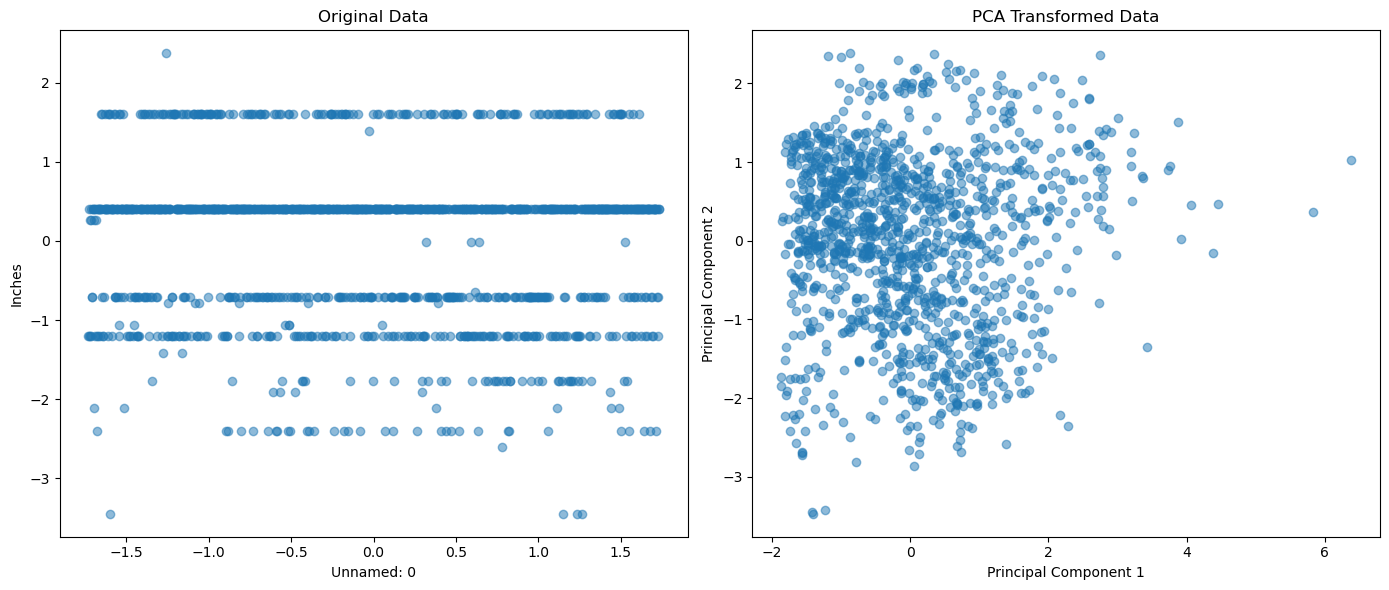

In [442]:


data.fillna(data.mean(numeric_only=True), inplace=True)

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

data = pd.get_dummies(data, columns=cat_features)

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)

print(data_pca.shape)
print(data_pca[:5]) 


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[numeric_features[0]], data[numeric_features[1]], alpha=0.5)
plt.title('Original Data')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])

pca = PCA(n_components=15)  
data_pca = pca.fit_transform(data)

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [443]:
type(data_pca)

numpy.ndarray

In [444]:
data_pca.ndim

2

# HANDLING IMBALANCED DATA

In [446]:
data.Price.value_counts(True)

Price
 0.537128    0.010744
-0.035331    0.010744
 0.966471    0.010744
-0.321560    0.008442
 0.107784    0.008442
               ...   
 1.382935    0.000767
-1.173092    0.000767
-0.521920    0.000767
 1.050909    0.000767
 2.254503    0.000767
Name: proportion, Length: 791, dtype: float64

In [447]:
data.fillna(data.mean(numeric_only=True), inplace=True)

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

data = pd.get_dummies(data, columns=cat_features)

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

X = data.drop(columns=['Price'])
y = data['Price']

if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

if len(np.unique(y)) < 20:  
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("Applied SMOTE.")
else:
    X_resampled, y_resampled = X, y
    print("Skipped SMOTE (target seems continuous).")

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Price'])], axis=1)

print(data_resampled.head())


Shape of X: (1303, 531), Shape of y: (1303,)
Skipped SMOTE (target seems continuous).
   Unnamed: 0    Inches  Company_Acer  Company_Apple  Company_Asus  \
0   -1.730722 -1.204407     -0.292973       7.813298     -0.371472   
1   -1.728063 -1.204407     -0.292973       7.813298     -0.371472   
2   -1.725405  0.408772     -0.292973      -0.127987     -0.371472   
3   -1.722746  0.268495     -0.292973       7.813298     -0.371472   
4   -1.720088 -1.204407     -0.292973       7.813298     -0.371472   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  Company_HP  \
0      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
1      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
2      -0.048038     -0.543349        -0.048038       -0.048038    1.937905   
3      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
4      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   

   ...  Weight_4.3

In [448]:
data_resampled.Price.value_counts(True)

Price
 0.537128    0.010744
-0.035331    0.010744
 0.966471    0.010744
-0.321560    0.008442
 0.107784    0.008442
               ...   
 1.382935    0.000767
-1.173092    0.000767
-0.521920    0.000767
 1.050909    0.000767
 2.254503    0.000767
Name: proportion, Length: 791, dtype: float64

In [449]:
data_resampled.shape

(1303, 532)

In [450]:
data.fillna(data.mean(numeric_only=True), inplace=True)

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

data = pd.get_dummies(data, columns=cat_features)

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

X = data.drop(columns=['Price'])
y = data['Price']

if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

if len(np.unique(y)) < 20:  
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_resample(X, y)
    print("Applied Random Undersampling.")
else:
    X_resampled, y_resampled = X, y
    print("Skipped Undersampling (Price seems continuous).")

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Price'])], axis=1)

print(data_resampled.head())


Shape of X: (1303, 531), Shape of y: (1303,)
Skipped Undersampling (Price seems continuous).
   Unnamed: 0    Inches  Company_Acer  Company_Apple  Company_Asus  \
0   -1.730722 -1.204407     -0.292973       7.813298     -0.371472   
1   -1.728063 -1.204407     -0.292973       7.813298     -0.371472   
2   -1.725405  0.408772     -0.292973      -0.127987     -0.371472   
3   -1.722746  0.268495     -0.292973       7.813298     -0.371472   
4   -1.720088 -1.204407     -0.292973       7.813298     -0.371472   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  Company_HP  \
0      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
1      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
2      -0.048038     -0.543349        -0.048038       -0.048038    1.937905   
3      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
4      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   

   ...  Wei

In [451]:
data_resampled.Price.value_counts()

Price
 0.537128    14
-0.035331    14
 0.966471    14
-0.321560    11
 0.107784    11
             ..
 1.382935     1
-1.173092     1
-0.521920     1
 1.050909     1
 2.254503     1
Name: count, Length: 791, dtype: int64

In [452]:

data.fillna(data.mean(numeric_only=True), inplace=True)

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

target_encoder = TargetEncoder(cols=cat_features)
data[cat_features] = target_encoder.fit_transform(data[cat_features], data['Price'])

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

X = data.drop(columns=['Price'])
y = data['Price']

print(X.head())
print(y.head())


   Unnamed: 0    Inches  Company_Acer  Company_Apple  Company_Asus  \
0   -1.730722 -1.204407     -0.292973       7.813298     -0.371472   
1   -1.728063 -1.204407     -0.292973       7.813298     -0.371472   
2   -1.725405  0.408772     -0.292973      -0.127987     -0.371472   
3   -1.722746  0.268495     -0.292973       7.813298     -0.371472   
4   -1.720088 -1.204407     -0.292973       7.813298     -0.371472   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  Company_HP  \
0      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
1      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
2      -0.048038     -0.543349        -0.048038       -0.048038    1.937905   
3      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   
4      -0.048038     -0.543349        -0.048038       -0.048038   -0.516021   

   ...  Weight_4.2kg  Weight_4.33kg  Weight_4.36kg  Weight_4.3kg  \
0  ...     -0.048038      -0.027714 

# TRAINING 

In [454]:

df = pd.read_csv('laptop.csv')
df = df.drop(columns=['Unnamed: 0'])

df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

def parse_memory(mem_str):
    mem_str = mem_str.replace('Flash Storage', 'SSD').replace('HDD', '').replace('SSD', '')
    mem_str = mem_str.replace(' ', '').replace('GB', '').replace('TB', '000')
    parts = re.split(r'\+|/', mem_str)
    total = 0
    for part in parts:
        try:
            total += int(part)
        except ValueError:
            continue
    return total

df['Memory'] = df['Memory'].apply(parse_memory)

# Features and Target
X = df[['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']]
y = df['Price']

# Categorical Columns
categorical_cols = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', TargetEncoder(), categorical_cols),  # Apply TargetEncoder to categorical features
        ('num', StandardScaler(), ['Ram', 'Memory', 'Weight', 'Inches'])  # Scale numerical features
    ], remainder='passthrough')),
    ('model', LinearRegression())  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model Performance: MAE = {mae:.2f}, RMSE = {rmse:.2f}")

Model Performance: MAE = 14126.10, RMSE = 21739.51


## PLOTTING GRAPHS

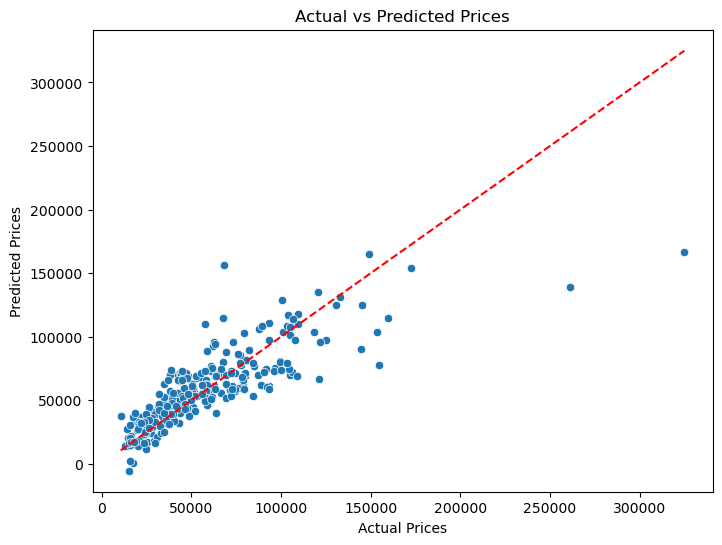

In [456]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a line for perfect predictions
plt.show()

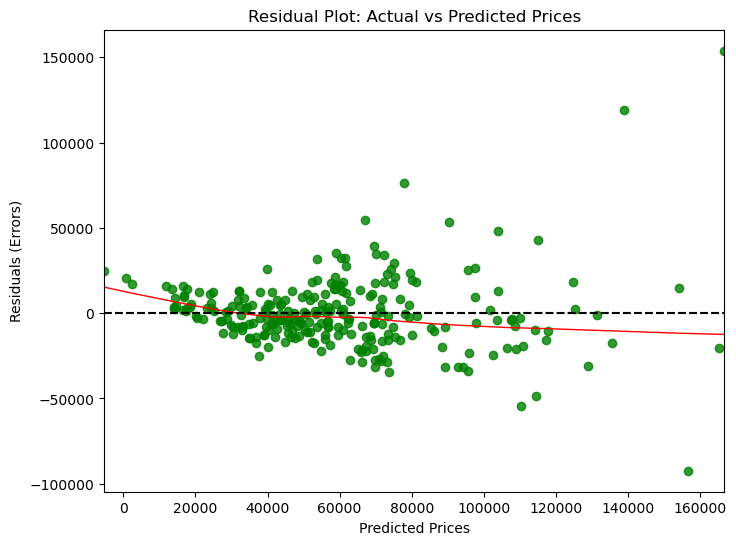

In [457]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot: Actual vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

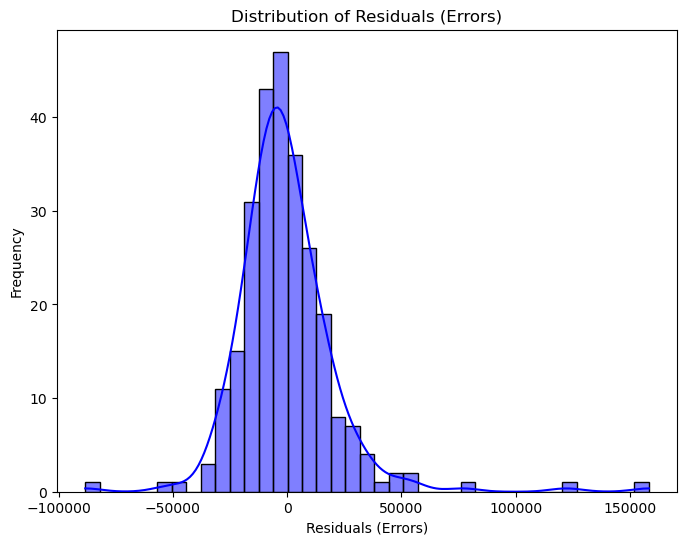

In [458]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()

In [459]:
metrics = {
    'Mean Absolute Error (MAE)': [mae],
    'Root Mean Squared Error (RMSE)': [rmse],
    'R-squared (R2)': [pipeline.score(X_test, y_test)]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  R-squared (R2)
0               14126.099725                    21739.506625        0.672229


In [460]:
new_data = pd.DataFrame([{
    'Company': 'HP',
    'TypeName': 'Notebook',
    'Inches': 15.6,
    'Cpu': 'Intel Core i5 7200U 2.5GHz',
    'Ram': 12,
    'Memory': 512,
    'Gpu': 'Intel HD Graphics 620',
    'OpSys': 'Windows 10',
    'Weight': 1.9
}])

predicted_price = pipeline.predict(new_data)
print(f"💰 Predicted Price: ₹{predicted_price[0]:,.2f}")

💰 Predicted Price: ₹66,973.71
